<a href="https://colab.research.google.com/github/ishfaqueuddin/assignment/blob/main/fifa2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT THE LIBRARIES....
import numpy as np # mathematics....
import pandas as pd # data analysis....
from matplotlib import pyplot as plt #visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go

#Libraries to visualize the dataset....
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Libraries for model creation....
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Libraries for feature importance....
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/FIFA_Supporter/FIFA_Supporter/FIFA 2018.xlsx")

In [ ]:
df.head(5).style.background_gradient(cmap='Blues')

In [ ]:
df.shape

(380, 72)

In [ ]:
df.ndim

2

In [ ]:
df.size

27360

In [ ]:
df.columns

Index(['Used Name', 'WC', 'WPS', 'Qmarks', 'Unique', 'Dic', 'Sixltr', 'funct',
       'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'verb', 'auxverb', 'past', 'present', 'future', 'adverb',
       'preps', 'conj', 'negate', 'quant', 'number', 'swear', 'social',
       'family', 'friend', 'humans', 'affect', 'posemo', 'negemo', 'anx',
       'anger', 'sad', 'cogmech', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'inhib', 'incl', 'excl', 'percept', 'see', 'hear', 'feel',
       'bio', 'body', 'health', 'sexual', 'ingest', 'relativ', 'motion',
       'space', 'time', 'work', 'achieve', 'leisure', 'home', 'money', 'relig',
       'death', 'assent', 'nonfl', 'filler', 'Team'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=380, step=1)

In [ ]:
round(df.describe(exclude = ['object']).T, 2).style.background_gradient(cmap='Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Used Name  376 non-null    object 
 1   WC         379 non-null    float64
 2   WPS        376 non-null    float64
 3   Qmarks     376 non-null    float64
 4   Unique     376 non-null    float64
 5   Dic        376 non-null    float64
 6   Sixltr     376 non-null    float64
 7   funct      376 non-null    float64
 8   pronoun    376 non-null    float64
 9   ppron      376 non-null    float64
 10  i          376 non-null    float64
 11  we         376 non-null    float64
 12  you        376 non-null    float64
 13  shehe      376 non-null    float64
 14  they       376 non-null    float64
 15  ipron      376 non-null    float64
 16  article    376 non-null    float64
 17  verb       376 non-null    float64
 18  auxverb    376 non-null    float64
 19  past       376 non-null    float64
 20  present   

In [ ]:
Discrete_features = [feature for feature in df.columns if df[feature].dtypes=='int64']
print("Discrete features features are :",Discrete_features)

Discrete features features are : []


In [ ]:
Continous_features = [feature for feature in df.columns if df[feature].dtypes=='float64']
print("Continous features features are :",Continous_features)

Continous features features are : ['WC', 'WPS', 'Qmarks', 'Unique', 'Dic', 'Sixltr', 'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future', 'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear', 'social', 'family', 'friend', 'humans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure', 'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler']


In [ ]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['UsedName', 'WC', 'WPS', 'Qmarks', 'Unique', 'Dic', 'Sixltr', 'funct',
       'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'verb', 'auxverb', 'past', 'present', 'future', 'adverb',
       'preps', 'conj', 'negate', 'quant', 'number', 'swear', 'social',
       'family', 'friend', 'humans', 'affect', 'posemo', 'negemo', 'anx',
       'anger', 'sad', 'cogmech', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'inhib', 'incl', 'excl', 'percept', 'see', 'hear', 'feel',
       'bio', 'body', 'health', 'sexual', 'ingest', 'relativ', 'motion',
       'space', 'time', 'work', 'achieve', 'leisure', 'home', 'money', 'relig',
       'death', 'assent', 'nonfl', 'filler', 'Team'],
      dtype='object')

<Axes: >

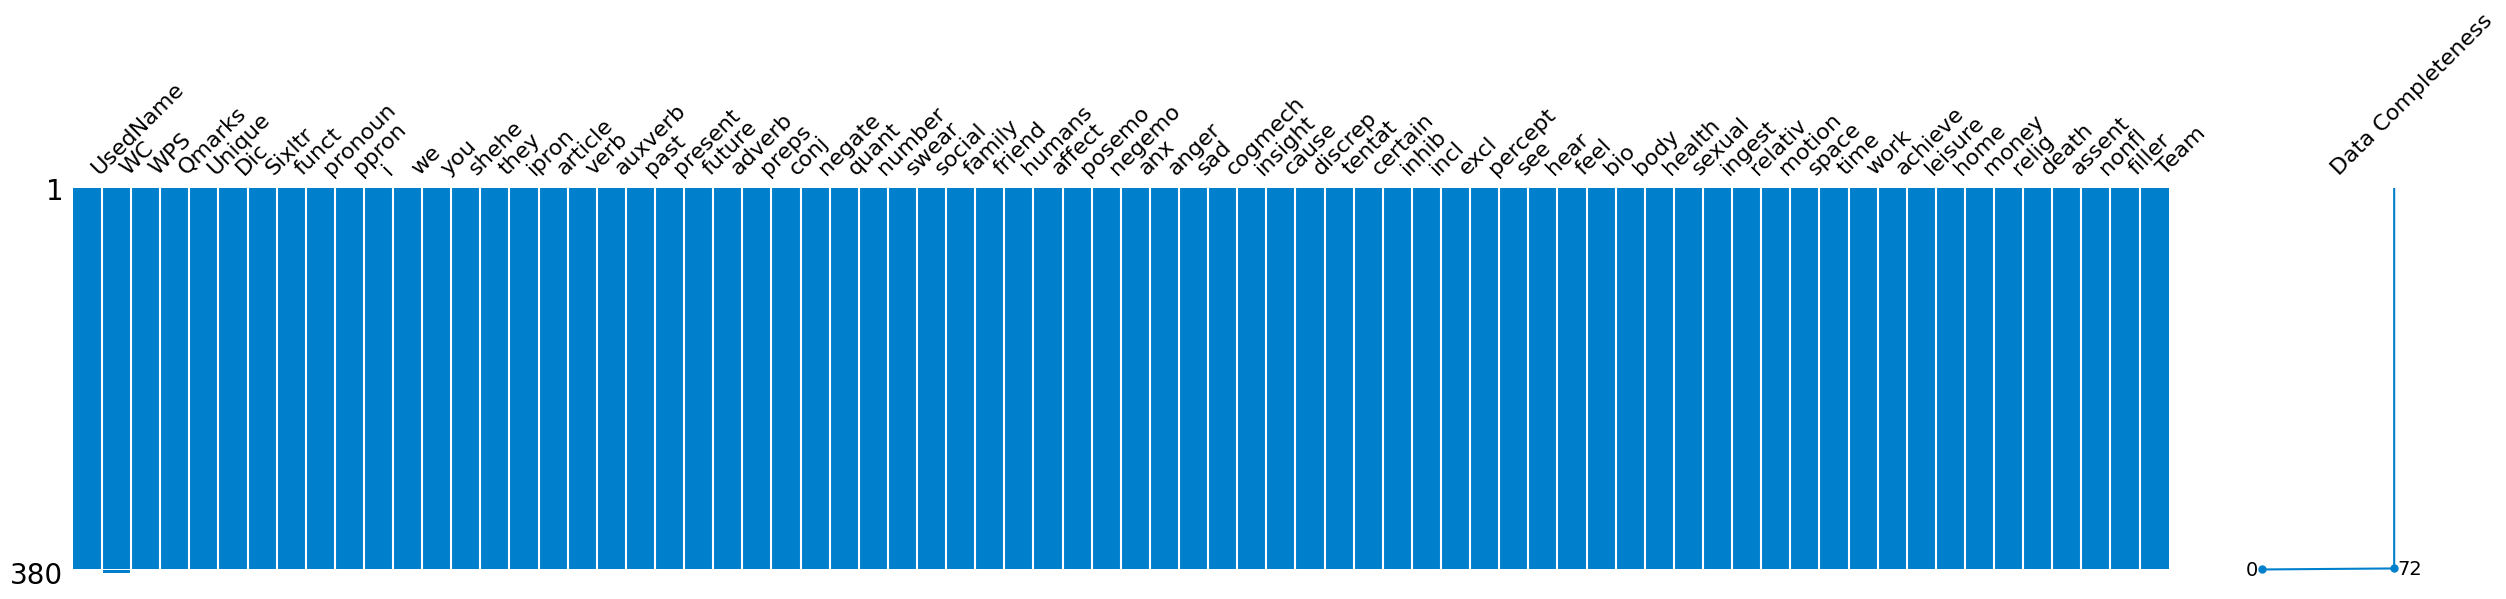

In [ ]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,figsize=(30,5),color=(0,0.5,0.8), labels=True)

<Axes: >

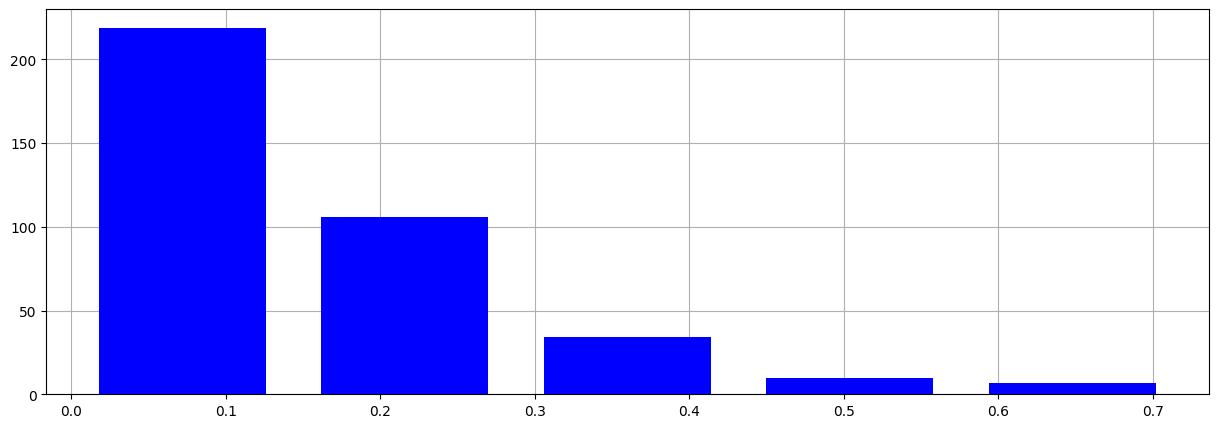

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df['Qmarks'].hist(bins=5, grid=True, figsize=(15,5), color='Blue', zorder=2, rwidth=0.75)

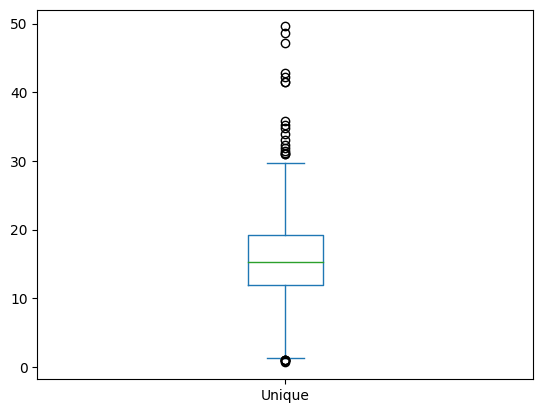

In [ ]:
#matplotlib and pyplot
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df['Unique'].plot(kind ='box')
plt.show()

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr


WC       WPS    Qmarks    Unique       Dic    Sixltr     funct  \
WC       1.000000  0.631941 -0.218109 -0.578342 -0.394268 -0.507549 -0.361525   
WPS      0.631941  1.000000 -0.308958 -0.371324 -0.439795 -0.476362 -0.414396   
Qmarks  -0.218109 -0.308958  1.000000  0.250642  0.404574  0.405864  0.397664   
Unique  -0.578342 -0.371324  0.250642  1.000000  0.426852  0.623060  0.380945   
Dic     -0.394268 -0.439795  0.404574  0.426852  1.000000  0.635627  0.989896   
Sixltr  -0.507549 -0.476362  0.405864  0.623060  0.635627  1.000000  0.564515   
funct   -0.361525 -0.414396  0.397664  0.380945  0.989896  0.564515  1.000000   
pronoun -0.334006 -0.355930  0.349424  0.286530  0.893379  0.414083  0.917214   
ppron   -0.334656 -0.325541  0.312635  0.269584  0.837677  0.400143  0.857421   
i       -0.279959 -0.189293  0.198308  0.222863  0.617649  0.253871  0.627908   
we      -0.249125 -0.319567  0.220037  0.249599  0.627167  0.471134  0.613036   
you     -0.280004 -0.302645  0.285563  0.239669  0.681309  0.367096  0.687285   
shehe   -0.161184 -0.240298  0.253595  0.079110  0.581017  0.221266  0.635877   
they    -0.202413 -0.299276  0.313284  0.144498  0.730959  0.264636  0.779591   
ipron   -0.296002 -0.372133  0.377996  0.285602  0.896696  0.393481  0.925394   
article -0.307257 -0.376322  0.322686  0.371450  0.835191  0.535254  0.831968   
verb    -0.343267 -0.381344  0.397821  0.349698  0.948602  0.484238  0.963072   
auxverb -0.326808 -0.366308  0.409379  0.347856  0.929287  0.478484  0.954152   
past    -0.263941 -0.298451  0.329291  0.243505  0.778711  0.378267  0.790176   
present -0.347482 -0.374923  0.387656  0.356714  0.926010  0.486071  0.938872   
future  -0.271519 -0.347447  0.381791  0.269144  0.830564  0.409722  0.850464   
adverb  -0.304234 -0.365359  0.392173  0.292092  0.909999  0.431204  0.933500   
preps   -0.342225 -0.376263  0.340006  0.410787  0.920486  0.667080  0.901105   
conj    -0.317086 -0.383360  0.390820  0.294188  0.904768  0.438992  0.931204   
negate  -0.288466 -0.334688  0.425740  0.293706  0.751286  0.344735  0.787190   
quant   -0.336135 -0.405364  0.329877  0.372913  0.899059  0.505624  0.908924   
number  -0.104886  0.010218 -0.087914 -0.059899 -0.106605 -0.075879 -0.093342   
swear   -0.124333 -0.124673  0.128753  0.049279  0.368024  0.019744  0.392529   
social  -0.353919 -0.421150  0.370720  0.313892  0.894644  0.522155  0.894831   
family  -0.242457 -0.230672  0.155618  0.264376  0.313376  0.239211  0.287354   
friend  -0.258742 -0.232766  0.109733  0.215943  0.386721  0.317708  0.348017   
humans  -0.245606 -0.281393  0.164974  0.204924  0.590798  0.287696  0.584604   
affect  -0.389677 -0.413375  0.321568  0.388589  0.869138  0.586699  0.834178   
posemo  -0.363958 -0.373406  0.221624  0.346060  0.744403  0.562423  0.695037   
negemo  -0.272553 -0.315990  0.396321  0.305436  0.752255  0.377664  0.764276   
anx     -0.180437 -0.194309  0.297628  0.212326  0.474856  0.266988  0.468190   
anger   -0.195507 -0.236387  0.320257  0.205020  0.583610  0.263249  0.596179   
sad     -0.278777 -0.328310  0.296006  0.308170  0.695749  0.362745  0.703686   
cogmech -0.348798 -0.414483  0.415605  0.378878  0.961446  0.533218  0.973156   
insight -0.284229 -0.371142  0.429790  0.303159  0.802350  0.454157  0.816179   
cause   -0.292601 -0.362150  0.376998  0.423848  0.827431  0.528889  0.831235   
discrep -0.281818 -0.344429  0.405209  0.290763  0.853760  0.373295  0.885120   
tentat  -0.305481 -0.360133  0.420947  0.323722  0.866104  0.411669  0.889032   
certain -0.327095 -0.388260  0.282829  0.333886  0.852142  0.437061  0.868035   
inhib   -0.277804 -0.211354  0.328684  0.301102  0.731863  0.521271  0.725626   
incl    -0.335097 -0.411284  0.331221  0.327636  0.892181  0.570485  0.879648   
excl    -0.299117 -0.341217  0.390948  0.316198  0.859014  0.367230  0.894309   
percept -0.366307 -0.374493  0.258320  0.391508  0.821801  0.548694  0.783253   
see     -0.328424 -0.343000  0.233925  0.38377

In [ ]:
import seaborn as sb

<Axes: >

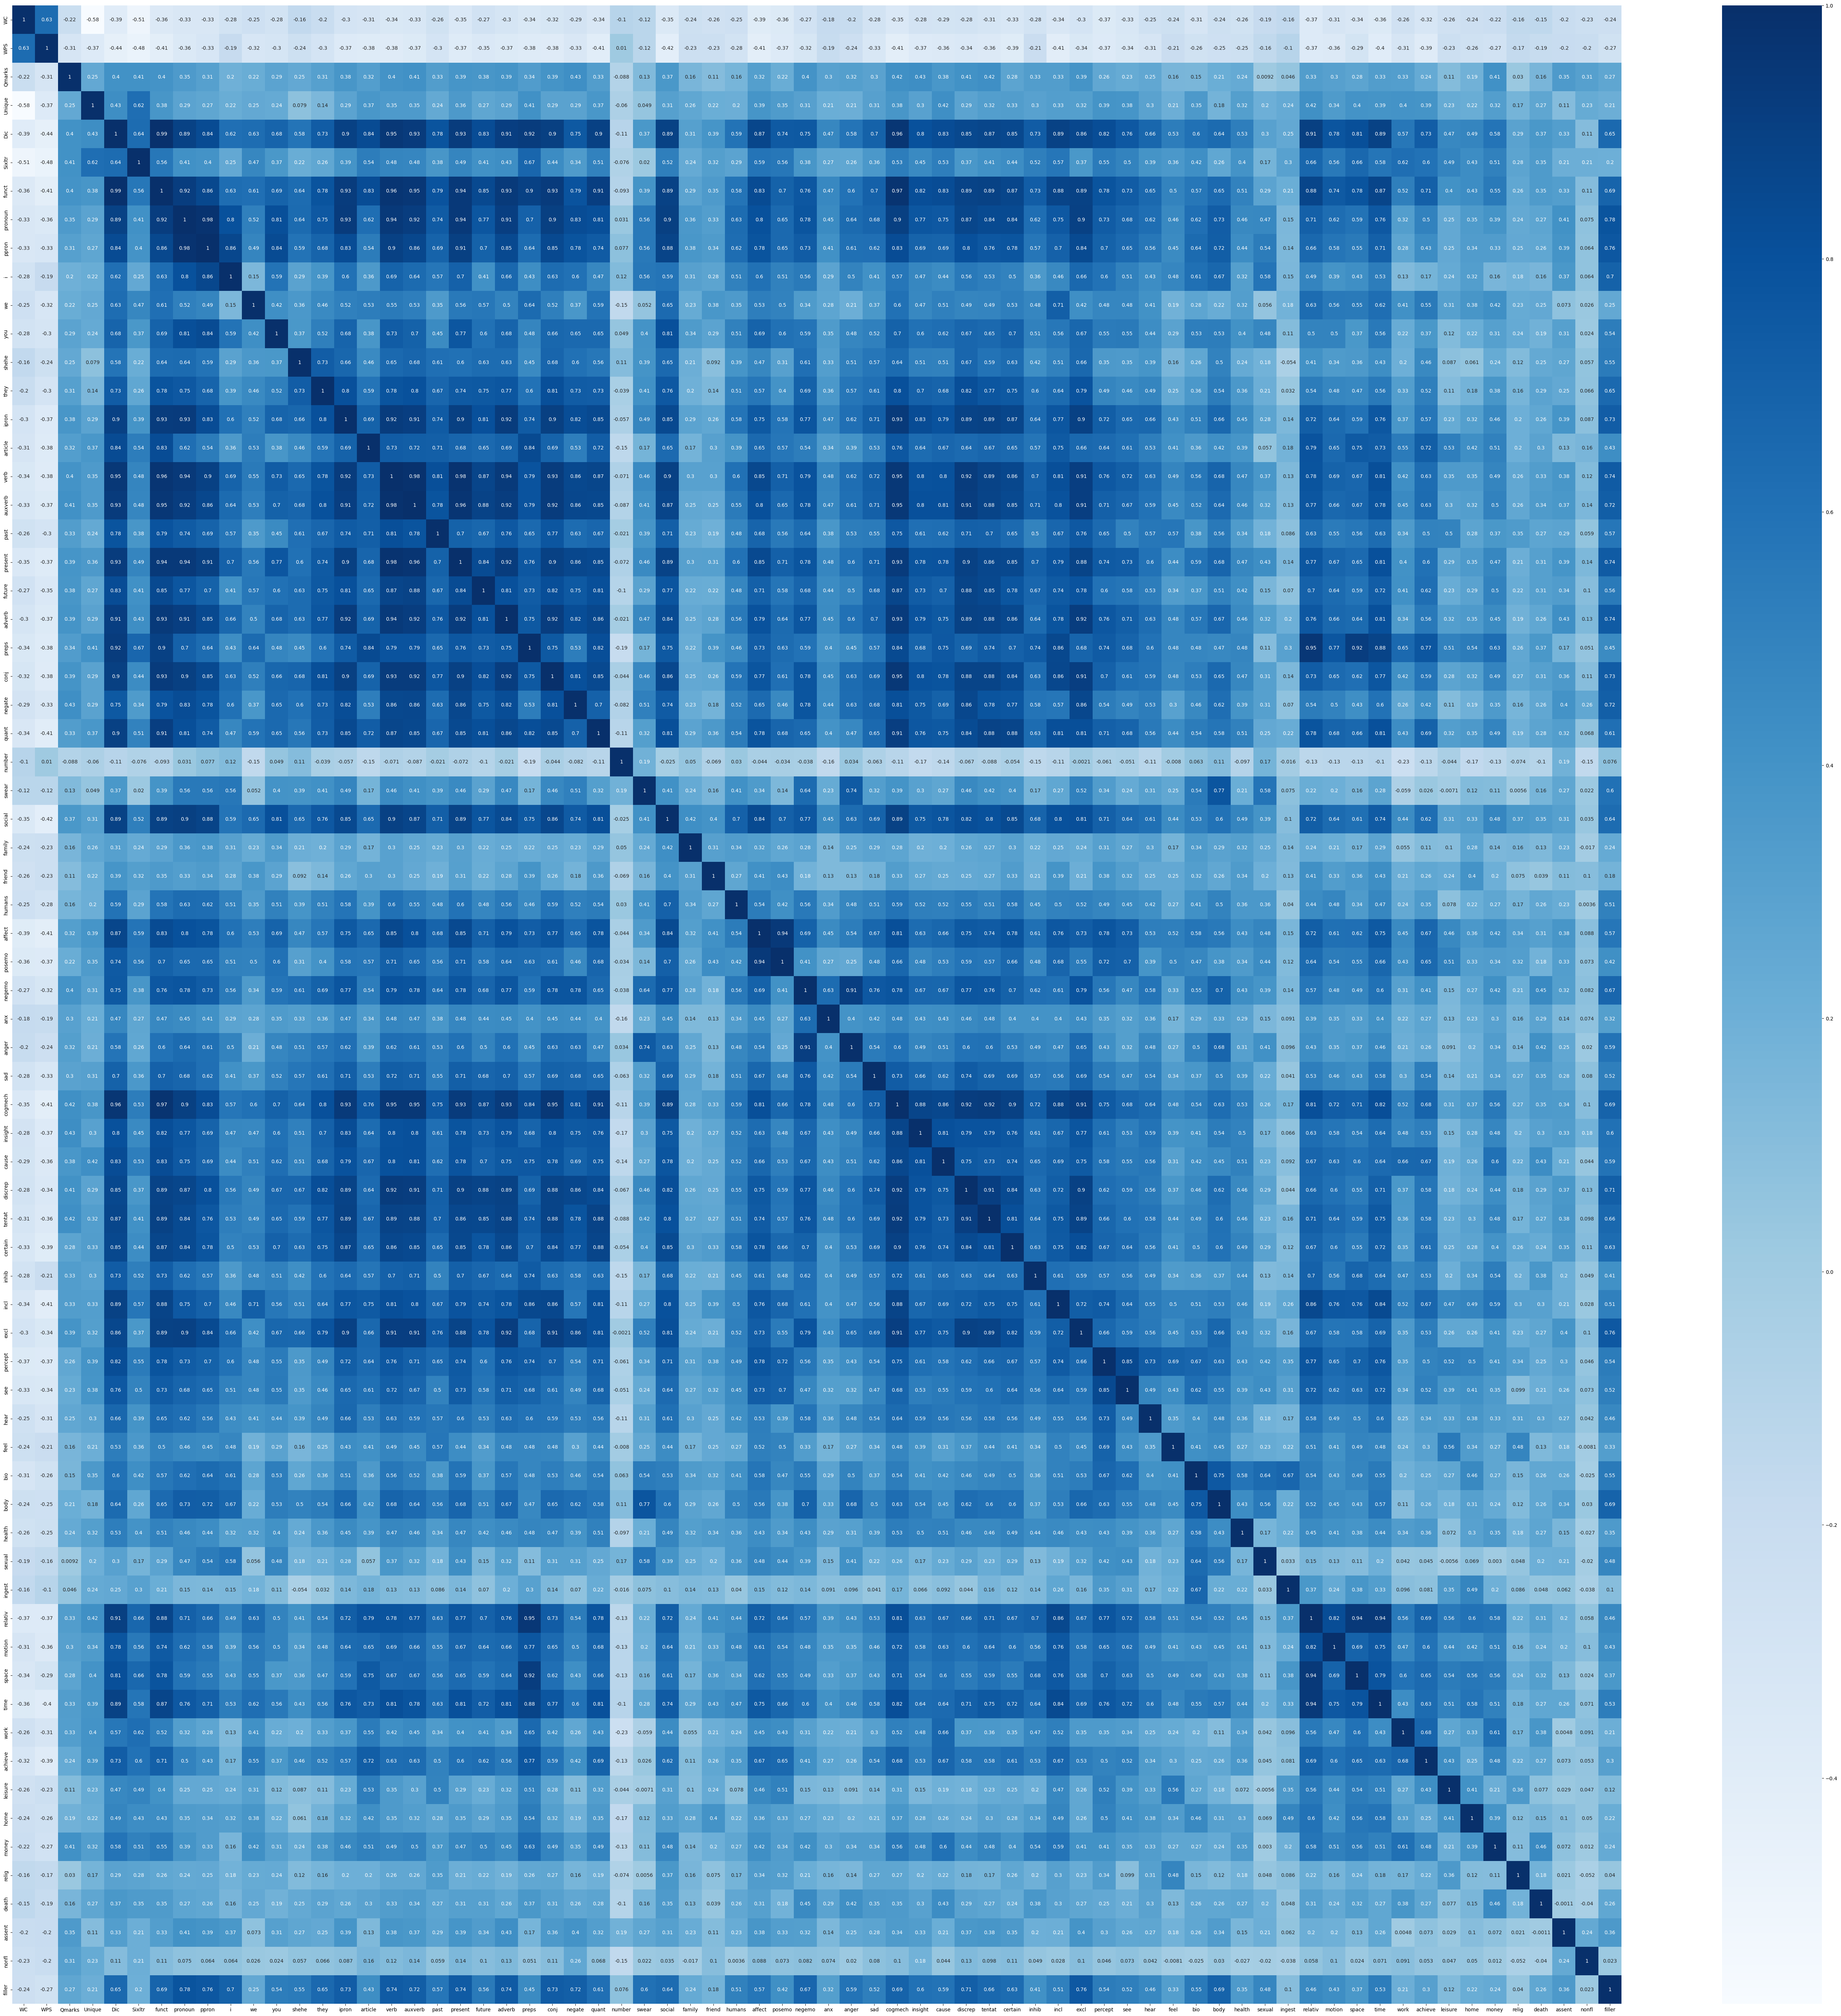

In [ ]:
corrmat= df.corr()
plt.figure(figsize=(72,72))  
sns.heatmap(corrmat,annot=True,cmap = "Blues",linewidth = 0)

<Axes: >

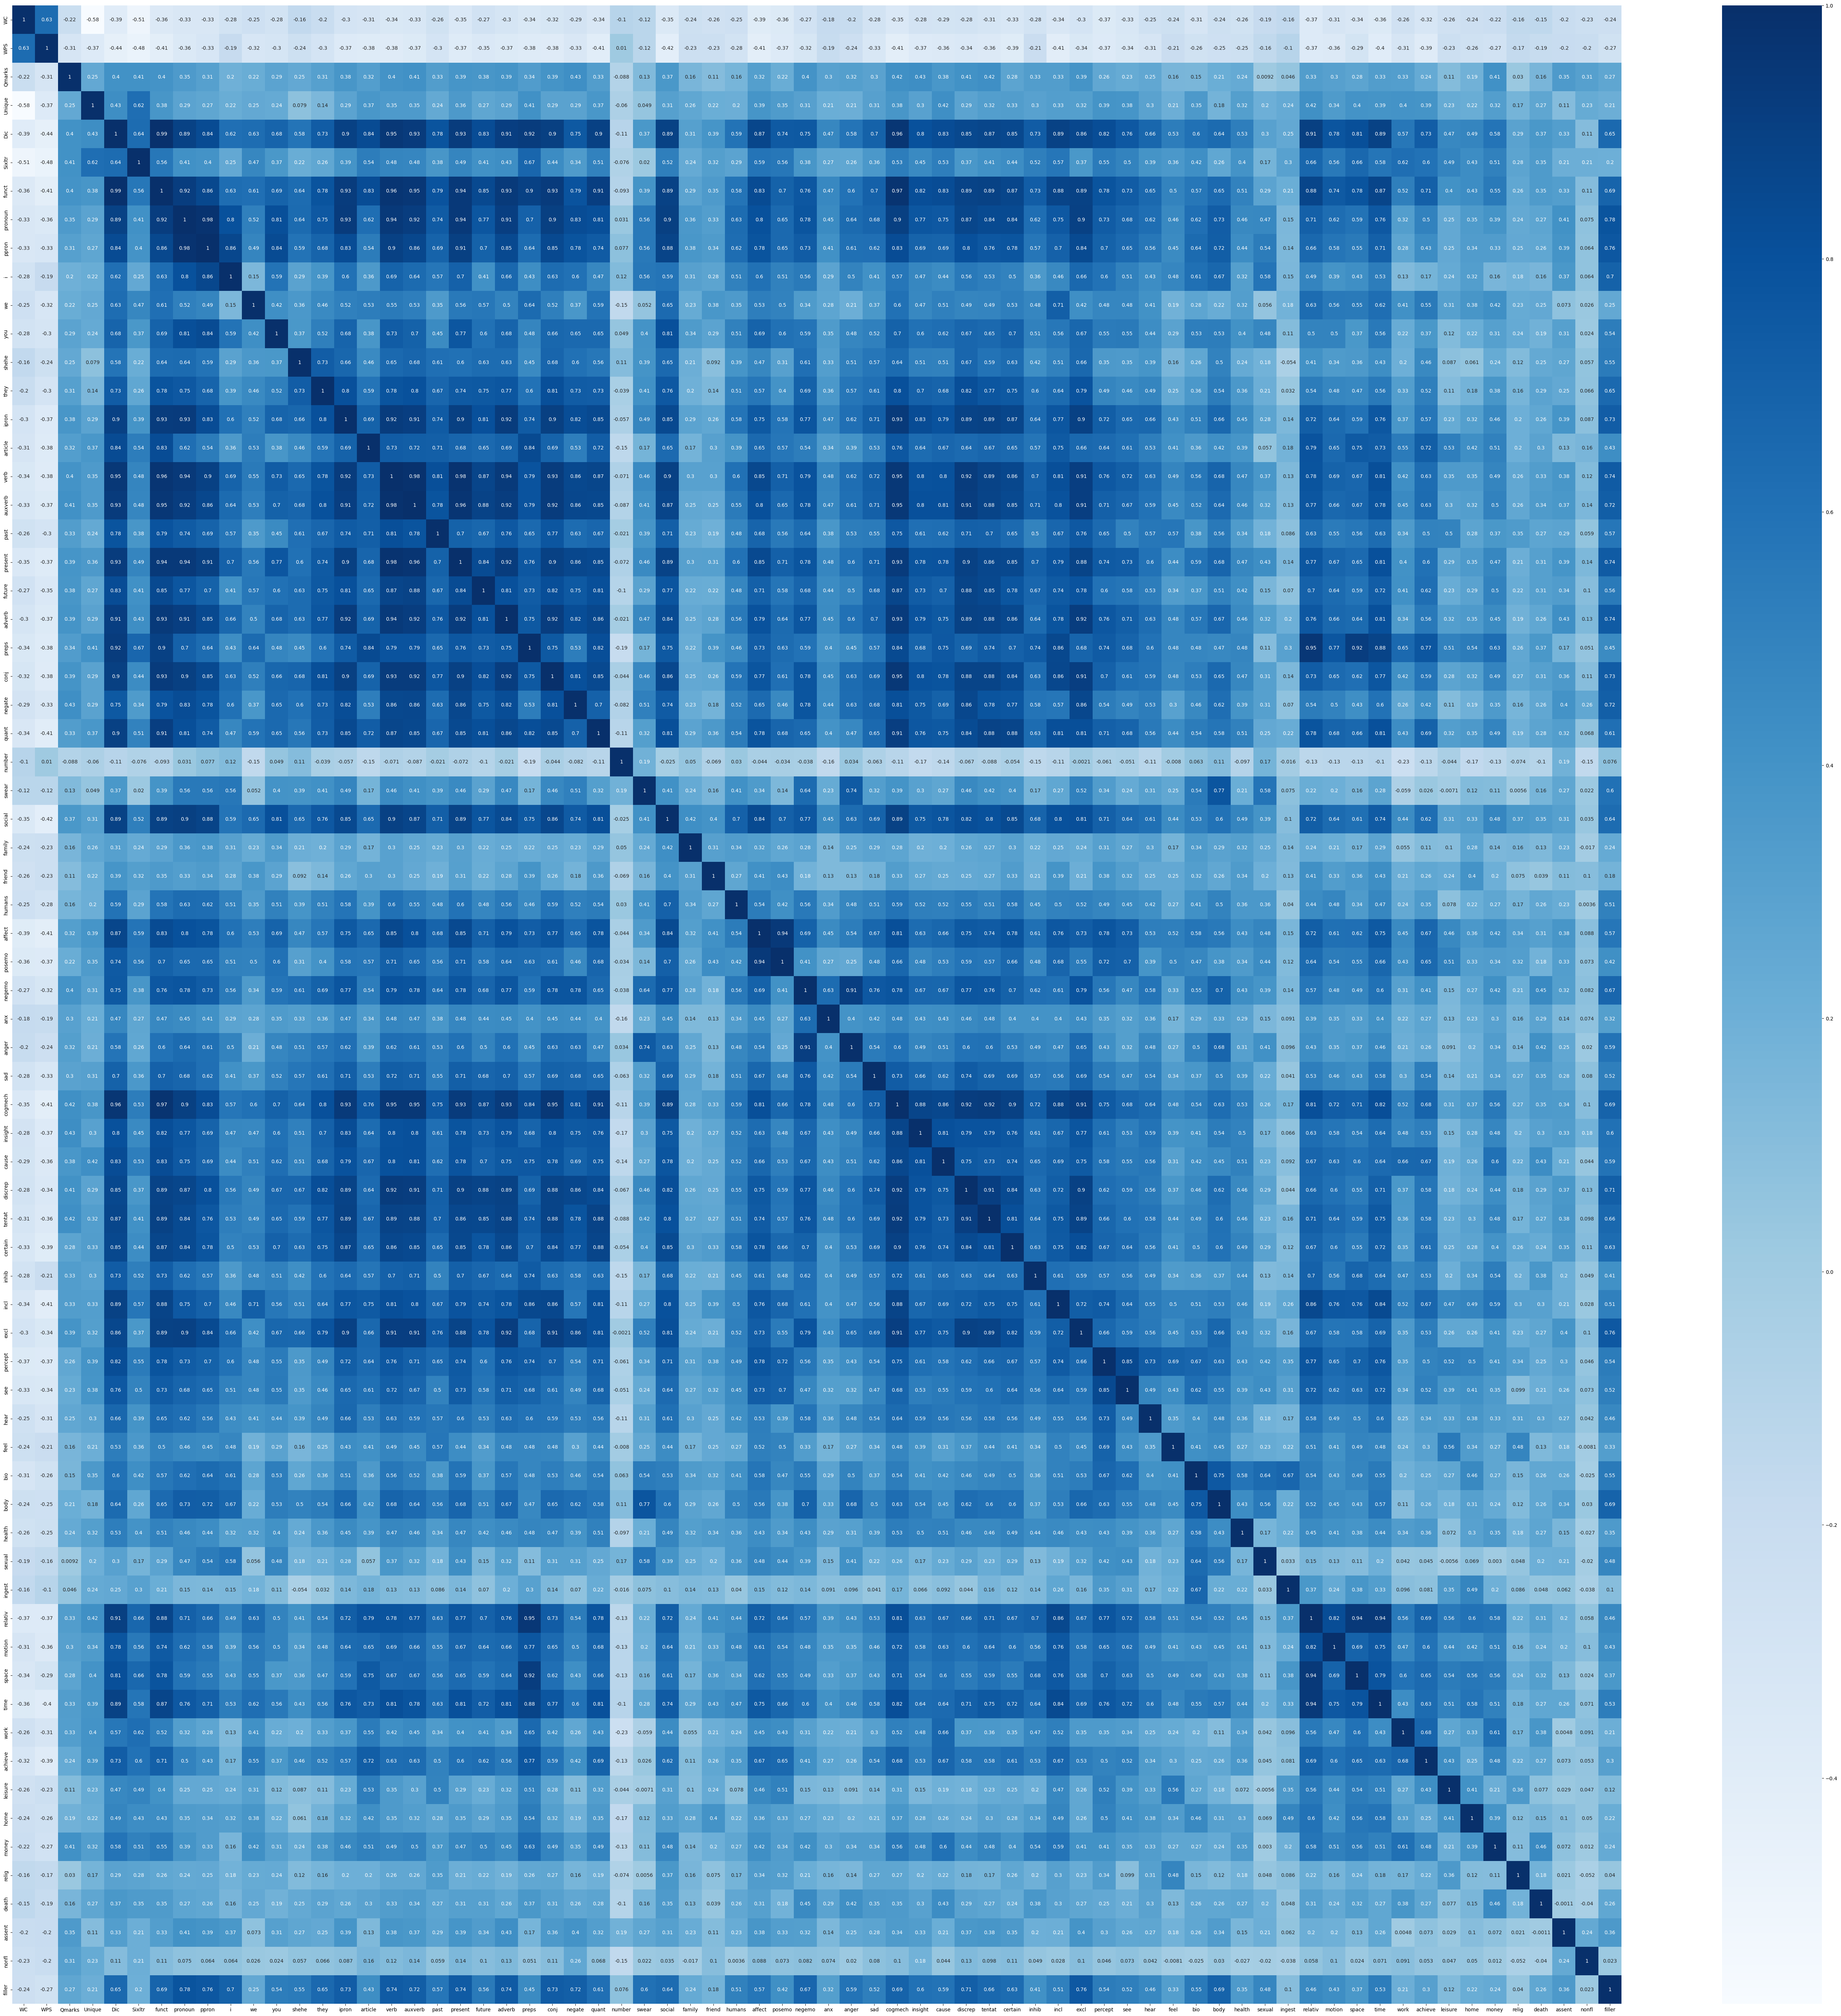

In [ ]:
corrmat= df.corr(method='pearson')
plt.figure(figsize=(72,72))  
sns.heatmap(corrmat,annot=True,cmap = "Blues",linewidth = 0)

In [ ]:
df.skew(axis = 0, skipna = True)

WC         19.325570
WPS         5.403286
Qmarks      1.613159
Unique      1.046658
Dic        -0.237769
Sixltr     -0.366127
funct      -0.137291
pronoun     0.119072
ppron       0.291696
i           1.273613
we          2.166793
you         0.728246
shehe       1.333480
they        0.795739
ipron       0.143958
article     0.225526
verb        0.084668
auxverb     0.167366
past        1.136144
present     0.138712
future      0.673963
adverb      0.257314
preps       0.032225
conj        0.211968
negate      0.619714
quant       0.295263
number      0.903410
swear       2.743950
social     -0.119468
family      2.041497
friend      2.490540
humans      1.827536
affect      0.057111
posemo      0.726285
negemo      0.839681
anx         6.585309
anger       2.145146
sad         0.816732
cogmech    -0.029346
insight     0.817341
cause       0.557396
discrep     0.497883
tentat      0.383872
certain     0.177031
inhib       1.411698
incl        0.131665
excl        0.407746
percept     0

In [ ]:
corrmat

WC       WPS    Qmarks    Unique       Dic    Sixltr     funct  \
WC       1.000000  0.631941 -0.218109 -0.578342 -0.394268 -0.507549 -0.361525   
WPS      0.631941  1.000000 -0.308958 -0.371324 -0.439795 -0.476362 -0.414396   
Qmarks  -0.218109 -0.308958  1.000000  0.250642  0.404574  0.405864  0.397664   
Unique  -0.578342 -0.371324  0.250642  1.000000  0.426852  0.623060  0.380945   
Dic     -0.394268 -0.439795  0.404574  0.426852  1.000000  0.635627  0.989896   
Sixltr  -0.507549 -0.476362  0.405864  0.623060  0.635627  1.000000  0.564515   
funct   -0.361525 -0.414396  0.397664  0.380945  0.989896  0.564515  1.000000   
pronoun -0.334006 -0.355930  0.349424  0.286530  0.893379  0.414083  0.917214   
ppron   -0.334656 -0.325541  0.312635  0.269584  0.837677  0.400143  0.857421   
i       -0.279959 -0.189293  0.198308  0.222863  0.617649  0.253871  0.627908   
we      -0.249125 -0.319567  0.220037  0.249599  0.627167  0.471134  0.613036   
you     -0.280004 -0.302645  0.285563  0.239669  0.681309  0.367096  0.687285   
shehe   -0.161184 -0.240298  0.253595  0.079110  0.581017  0.221266  0.635877   
they    -0.202413 -0.299276  0.313284  0.144498  0.730959  0.264636  0.779591   
ipron   -0.296002 -0.372133  0.377996  0.285602  0.896696  0.393481  0.925394   
article -0.307257 -0.376322  0.322686  0.371450  0.835191  0.535254  0.831968   
verb    -0.343267 -0.381344  0.397821  0.349698  0.948602  0.484238  0.963072   
auxverb -0.326808 -0.366308  0.409379  0.347856  0.929287  0.478484  0.954152   
past    -0.263941 -0.298451  0.329291  0.243505  0.778711  0.378267  0.790176   
present -0.347482 -0.374923  0.387656  0.356714  0.926010  0.486071  0.938872   
future  -0.271519 -0.347447  0.381791  0.269144  0.830564  0.409722  0.850464   
adverb  -0.304234 -0.365359  0.392173  0.292092  0.909999  0.431204  0.933500   
preps   -0.342225 -0.376263  0.340006  0.410787  0.920486  0.667080  0.901105   
conj    -0.317086 -0.383360  0.390820  0.294188  0.904768  0.438992  0.931204   
negate  -0.288466 -0.334688  0.425740  0.293706  0.751286  0.344735  0.787190   
quant   -0.336135 -0.405364  0.329877  0.372913  0.899059  0.505624  0.908924   
number  -0.104886  0.010218 -0.087914 -0.059899 -0.106605 -0.075879 -0.093342   
swear   -0.124333 -0.124673  0.128753  0.049279  0.368024  0.019744  0.392529   
social  -0.353919 -0.421150  0.370720  0.313892  0.894644  0.522155  0.894831   
family  -0.242457 -0.230672  0.155618  0.264376  0.313376  0.239211  0.287354   
friend  -0.258742 -0.232766  0.109733  0.215943  0.386721  0.317708  0.348017   
humans  -0.245606 -0.281393  0.164974  0.204924  0.590798  0.287696  0.584604   
affect  -0.389677 -0.413375  0.321568  0.388589  0.869138  0.586699  0.834178   
posemo  -0.363958 -0.373406  0.221624  0.346060  0.744403  0.562423  0.695037   
negemo  -0.272553 -0.315990  0.396321  0.305436  0.752255  0.377664  0.764276   
anx     -0.180437 -0.194309  0.297628  0.212326  0.474856  0.266988  0.468190   
anger   -0.195507 -0.236387  0.320257  0.205020  0.583610  0.263249  0.596179   
sad     -0.278777 -0.328310  0.296006  0.308170  0.695749  0.362745  0.703686   
cogmech -0.348798 -0.414483  0.415605  0.378878  0.961446  0.533218  0.973156   
insight -0.284229 -0.371142  0.429790  0.303159  0.802350  0.454157  0.816179   
cause   -0.292601 -0.362150  0.376998  0.423848  0.827431  0.528889  0.831235   
discrep -0.281818 -0.344429  0.405209  0.290763  0.853760  0.373295  0.885120   
tentat  -0.305481 -0.360133  0.420947  0.323722  0.866104  0.411669  0.889032   
certain -0.327095 -0.388260  0.282829  0.333886  0.852142  0.437061  0.868035   
inhib   -0.277804 -0.211354  0.328684  0.301102  0.731863  0.521271  0.725626   
incl    -0.335097 -0.411284  0.331221  0.327636  0.892181  0.570485  0.879648   
excl    -0.299117 -0.341217  0.390948  0.316198  0.859014  0.367230  0.894309   
percept -0.366307 -0.374493  0.258320  0.391508  0.821801  0.548694  0.783253   
see     -0.328424 -0.343000  0.233925  0.38377

In [ ]:
df.kurtosis(axis = 0, skipna = True)

WC         375.259634
WPS         32.758477
Qmarks       3.375565
Unique       2.756828
Dic         -0.851583
Sixltr       0.146269
funct       -0.946506
pronoun     -0.852945
ppron       -0.541169
i            1.962902
we          10.869996
you          0.091465
shehe        1.836056
they         0.213087
ipron       -0.944976
article     -0.557561
verb        -0.818199
auxverb     -0.808778
past         4.157637
present     -0.696800
future       0.460743
adverb      -0.801949
preps       -0.839356
conj        -0.557127
negate      -0.051686
quant        0.395070
number       3.016522
swear        8.123170
social      -0.907824
family       6.563284
friend       9.290262
humans       7.530494
affect      -0.320852
posemo       1.532597
negemo       0.898267
anx         71.727970
anger        9.130165
sad          1.018353
cogmech     -1.007323
insight      2.570925
cause        0.207827
discrep     -0.332006
tentat      -0.558918
certain     -0.638037
inhib        6.503172
incl      

In [ ]:
df = df.dropna()
print(df)

    UsedName        WC      WPS  Qmarks  Unique    Dic  Sixltr  funct  \
0       U_88  669308.0  3297.08    0.00    1.06   1.60    0.69   1.20   
1      U_240  641375.0  1757.19    0.00    1.00   1.81    1.02   1.32   
2       U_11  606008.0  2669.64    0.00    0.97   0.85    0.54   0.53   
3      U_111  564739.0  3691.10    0.01    0.63   0.80    0.44   0.54   
4      U_295  469260.0  1125.32    0.00    1.02   1.37    0.99   0.86   
5      U_247  468737.0   563.39    0.02    0.82   1.26    0.66   0.87   
6      U_167  461953.0  4052.22    0.00    1.29   2.25    1.37   0.91   
7      U_257  320245.0   480.13    0.02    2.69   6.55    1.87   3.99   
8       U_61  317261.0   864.47    0.01    3.20   4.28    3.17   2.34   
9      U_109  285865.0   621.45    0.02    2.43   2.91    1.94   1.69   
10      U_60  249756.0   256.42    0.05    4.66   9.63    4.63   5.73   
11     U_210  245614.0   259.36    0.02    4.19   7.71    4.98   4.51   
12     U_261  239001.0   244.38    0.03    5.69  10

In [ ]:
df['Team'].replace(['ARG', 'BRA', 'CRO', 'ENG', 'FRA', 'GER', 'POR'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
print(df)

    UsedName        WC      WPS  Qmarks  Unique    Dic  Sixltr  funct  \
0       U_88  669308.0  3297.08    0.00    1.06   1.60    0.69   1.20   
1      U_240  641375.0  1757.19    0.00    1.00   1.81    1.02   1.32   
2       U_11  606008.0  2669.64    0.00    0.97   0.85    0.54   0.53   
3      U_111  564739.0  3691.10    0.01    0.63   0.80    0.44   0.54   
4      U_295  469260.0  1125.32    0.00    1.02   1.37    0.99   0.86   
5      U_247  468737.0   563.39    0.02    0.82   1.26    0.66   0.87   
6      U_167  461953.0  4052.22    0.00    1.29   2.25    1.37   0.91   
7      U_257  320245.0   480.13    0.02    2.69   6.55    1.87   3.99   
8       U_61  317261.0   864.47    0.01    3.20   4.28    3.17   2.34   
9      U_109  285865.0   621.45    0.02    2.43   2.91    1.94   1.69   
10      U_60  249756.0   256.42    0.05    4.66   9.63    4.63   5.73   
11     U_210  245614.0   259.36    0.02    4.19   7.71    4.98   4.51   
12     U_261  239001.0   244.38    0.03    5.69  10

In [ ]:
df = df.drop(['UsedName'], axis=1) 


In [ ]:
col_strong_corr=[]
count=0
for col in pearsoncorr.columns:
    for i in range(0,70):
        if(pearsoncorr[col][i]>= 0.9):
            count=count+1
    val=(col,count)
    col_strong_corr.append(val)
    count=0
      

In [ ]:
print(col_strong_corr)

[('WC', 1), ('WPS', 1), ('Qmarks', 1), ('Unique', 1), ('Dic', 10), ('Sixltr', 1), ('funct', 12), ('pronoun', 11), ('ppron', 3), ('i', 1), ('we', 1), ('you', 1), ('shehe', 1), ('they', 1), ('ipron', 9), ('article', 1), ('verb', 12), ('auxverb', 12), ('past', 1), ('present', 10), ('future', 1), ('adverb', 11), ('preps', 5), ('conj', 10), ('negate', 1), ('quant', 3), ('number', 1), ('swear', 1), ('social', 2), ('family', 1), ('friend', 1), ('humans', 1), ('affect', 2), ('posemo', 2), ('negemo', 2), ('anx', 1), ('anger', 2), ('sad', 1), ('cogmech', 14), ('insight', 1), ('cause', 1), ('discrep', 5), ('tentat', 3), ('certain', 1), ('inhib', 1), ('incl', 1), ('excl', 6), ('percept', 1), ('see', 1), ('hear', 1), ('feel', 1), ('bio', 1), ('body', 1), ('health', 1), ('sexual', 1), ('ingest', 1), ('relativ', 5), ('motion', 1), ('space', 3), ('time', 2), ('work', 1), ('achieve', 1), ('leisure', 1), ('home', 1), ('money', 1), ('relig', 1), ('death', 1), ('assent', 1), ('nonfl', 1), ('filler', 1)]


In [ ]:
col_strong_corr=[]
count=0
for col in pearsoncorr.columns:
    for i in range(0,70):
        if(pearsoncorr[col][i]>= 0.9):
            count=count+1
    if( count>=3):
        val=(col,count)
        col_strong_corr.append(val)
    count=0

In [ ]:
print(col_strong_corr)

[('Dic', 10), ('funct', 12), ('pronoun', 11), ('ppron', 3), ('ipron', 9), ('verb', 12), ('auxverb', 12), ('present', 10), ('adverb', 11), ('preps', 5), ('conj', 10), ('quant', 3), ('cogmech', 14), ('discrep', 5), ('tentat', 3), ('excl', 6), ('relativ', 5), ('space', 3)]


In [ ]:
col_strong_corr=[]
count=0
for col in pearsoncorr.columns:
    for i in range(0,70):
        if(pearsoncorr[col][i]>= 0.9):
            count=count+1
    if( count>=3):
        col_strong_corr.append(col)
    count=0

In [ ]:
print(col_strong_corr)

['Dic', 'funct', 'pronoun', 'ppron', 'ipron', 'verb', 'auxverb', 'present', 'adverb', 'preps', 'conj', 'quant', 'cogmech', 'discrep', 'tentat', 'excl', 'relativ', 'space']


In [ ]:
len(df.columns)

71

In [ ]:
for i in col_strong_corr:
    df=df.drop([i], axis=1)
    

In [ ]:
len(df.columns)

53

In [ ]:
df.columns 

Index(['WC', 'WPS', 'Qmarks', 'Unique', 'Sixltr', 'i', 'we', 'you', 'shehe',
       'they', 'article', 'past', 'future', 'negate', 'number', 'swear',
       'social', 'family', 'friend', 'humans', 'affect', 'posemo', 'negemo',
       'anx', 'anger', 'sad', 'insight', 'cause', 'certain', 'inhib', 'incl',
       'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual',
       'ingest', 'motion', 'time', 'work', 'achieve', 'leisure', 'home',
       'money', 'relig', 'death', 'assent', 'nonfl', 'filler', 'Team'],
      dtype='object')

In [ ]:
X= df.drop(["Team"],axis =1)
y= df["Team"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
#Building piplines for model selection

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestRegressor())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                       ("XGB",XGBRegressor(objective='reg:squarederror'))])

#List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb]

# Dictionary of pipelines and model types
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#Getting CV scores    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s : %f" % (pipe_dict[i], abs(cv_score.mean())))

LinearRegression : 1.934535
DecisionTree : 2.356656
RandomForest : 1.711953
KNeighbors : 1.854845
XGBRegressor : 1.855290


In [ ]:
# Model prediction on test data
pred = pipeline_lr.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,index = ["R-Squared","Adjusted R-Squared", "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient(cmap="Blues")

In [ ]:
model = RandomForestRegressor()
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8419305046086549

That means our Random Forest **Model Accuracy** is around 84.66%

In [ ]:
x= df.iloc [:, : -1]

In [ ]:
y= df.iloc [:, -1 :]

In [ ]:
# create regressor object
model = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
model.fit(x, y)

RandomForestRegressor(random_state=0)

In [ ]:
final = RandomForestRegressor()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)

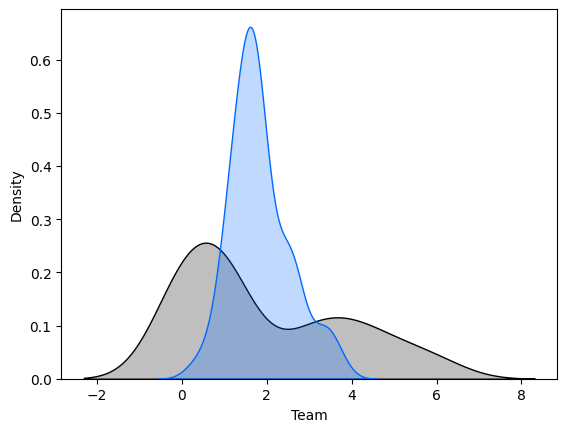

In [ ]:
sns.kdeplot(y_test, color = "#000000", shade=True) # Actual
sns.kdeplot(final_pred, color = "#0068ff", shade=True) # Predicted
plt.xlabel('Team');